In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [23]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [ ]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [ ]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


#ENCODING

In [5]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

In [24]:
education_mapping = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}
df['Education'] = df['Education'].map(education_mapping)
#print(df['Education'].head())
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


/tmp/ipython-input-1486551314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer_Satisfaction', palette='viridis')


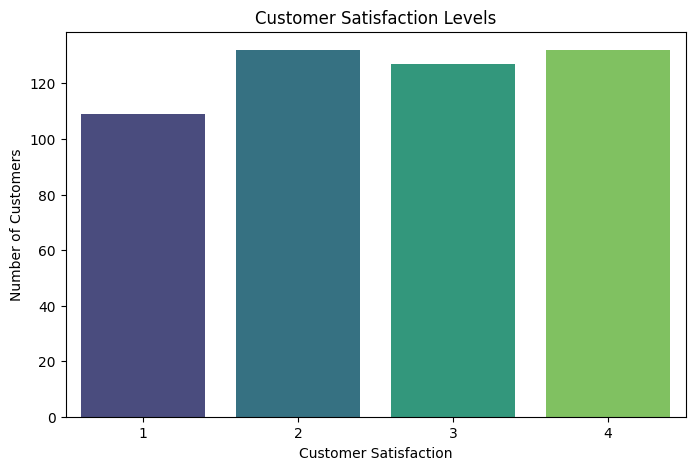

In [10]:
# Barplot showing customer satisfaction level
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Customer_Satisfaction', palette='viridis')
plt.title('Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Number of Customers')
plt.show()







#Overall Customer Satisfaction balance. Customer satisfaction 1 is the lowest among all. The difference between levels is not too large, indicating that the distribution of customer satisfaction is quite even, but there is still room for improvement to reduce the number of customers with low satisfaction

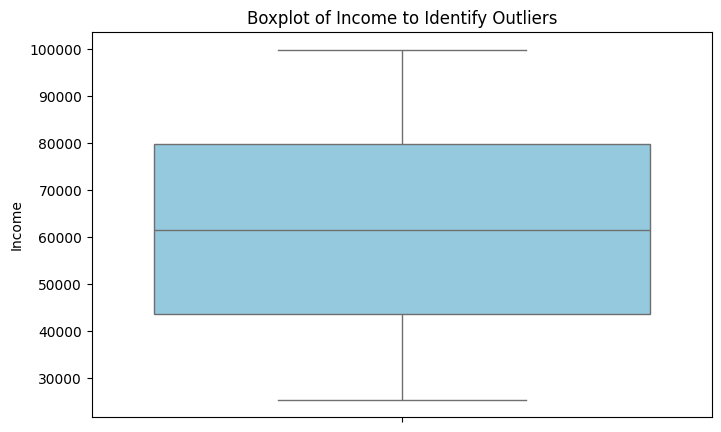

In [17]:
# Boxplot for 'Income' to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Income', color='skyblue')
plt.title('Boxplot of Income to Identify Outliers')
plt.ylabel('Income')
plt.show()

#Overall data pretty balance and no outliers

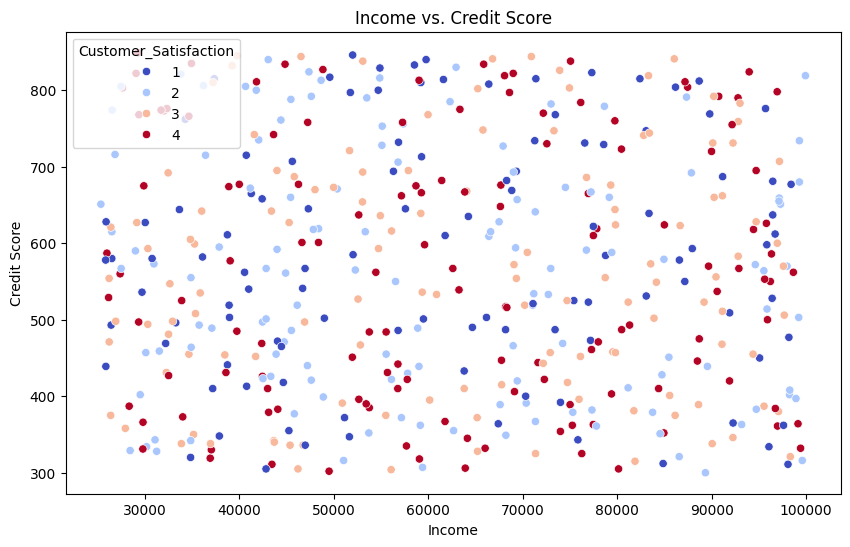

In [12]:
# Scatterplot: Income vs. Credit_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Credit_Score', hue='Customer_Satisfaction', palette='coolwarm')
plt.title('Income vs. Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()

# Data is spread out evenly both from income credit score and customer satisfaction

In [25]:
# Create a StandardScaler object
sc = StandardScaler()

# Fit and transform the selected columns
df_scaled_numerical = sc.fit_transform(df[['Income', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit']])

df_scaled = pd.DataFrame(df_scaled_numerical, columns=['Income', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit'])

# Add original columns that were not scaled
df_scaled[['Age', 'Education', 'Credit_Score', 'Years_with_Bank', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity']] = df[['Age', 'Education', 'Credit_Score', 'Years_with_Bank', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity']]

df_scaled.head()

,Income,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Age,Education,Credit_Score,Years_with_Bank,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,-0.260713,-1.058293,-1.606308,-0.861669,57,1,503,1,0.975409,1,0.202693
1,0.749977,-0.748287,1.619378,0.428724,-1.189034,60,0,779,2,0.945920,2,0.549358
2,0.364249,1.619930,0.670893,-0.628469,-0.821645,46,0,519,14,0.272664,3,0.842993
3,0.165665,0.993049,1.002068,1.392847,-1.422533,42,0,834,17,0.814385,4,0.119473
4,-0.250263,0.331341,-1.547513,1.628264,-0.083694,36,1,410,12,0.346523,4,0.990168


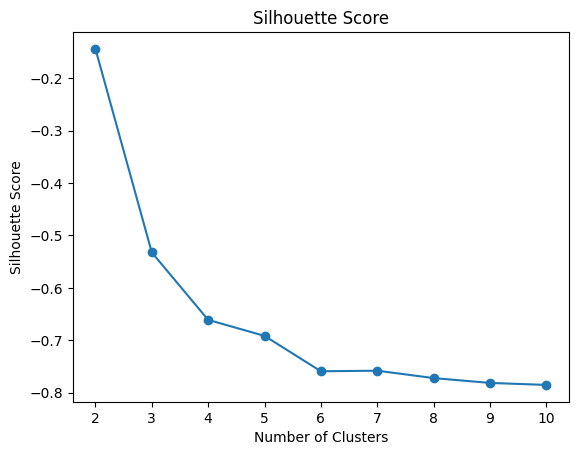

In [26]:
# Scaled
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

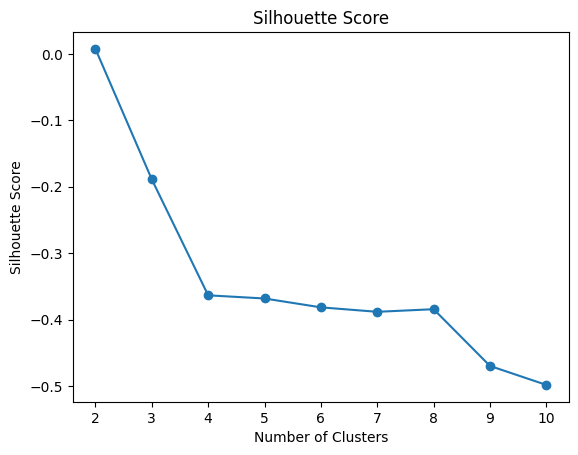

In [27]:
# Unscaled
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


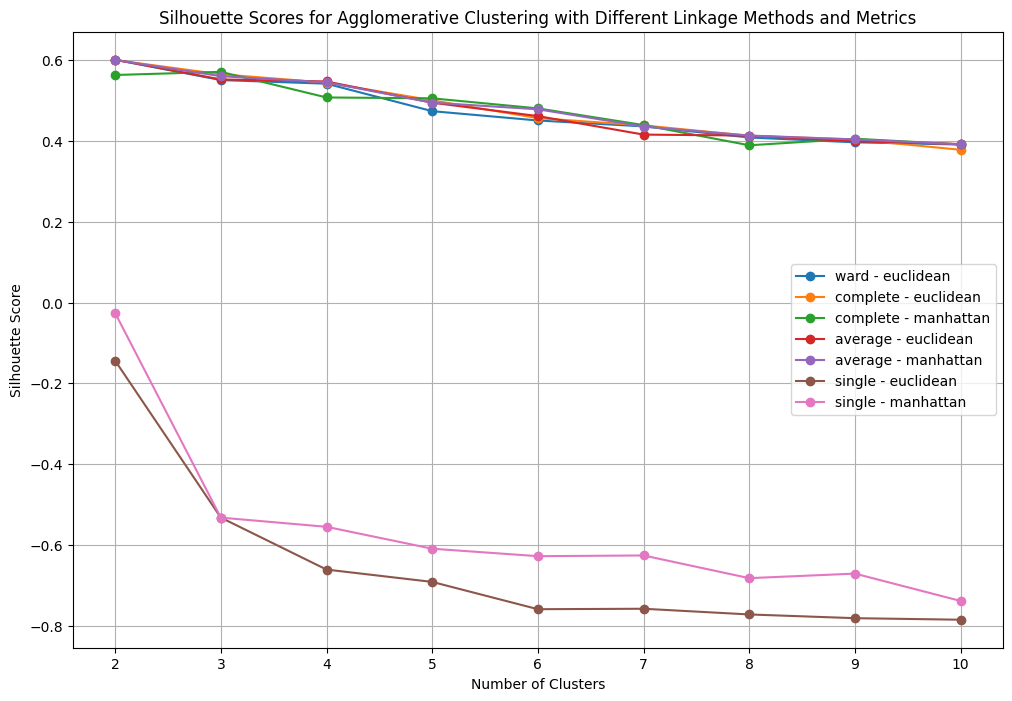

Best Silhouette Score: 0.6012726140261916
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [28]:
# Scaled
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Skipping Ward linkage with Manhattan metric (not supported).


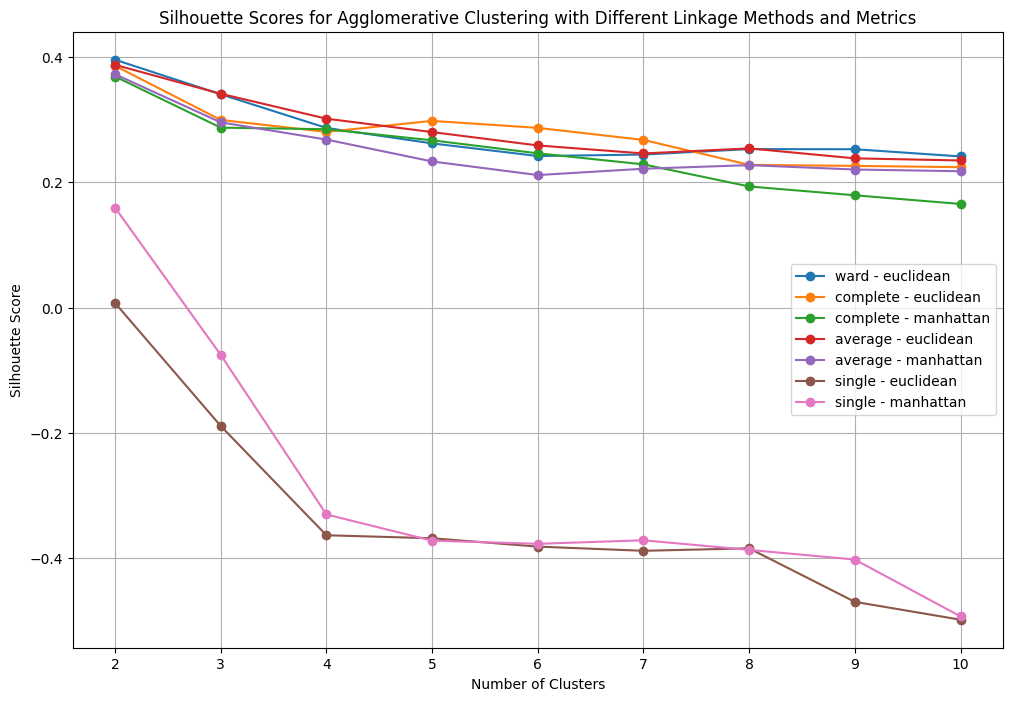

Best Silhouette Score: 0.39572706946177905
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [29]:
#Unscaled
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

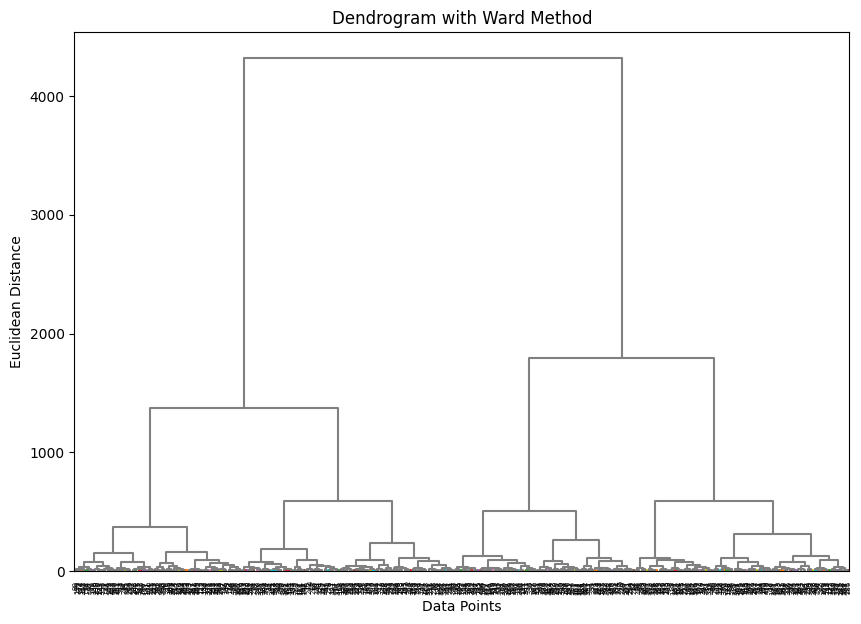

In [30]:
#Scaled
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

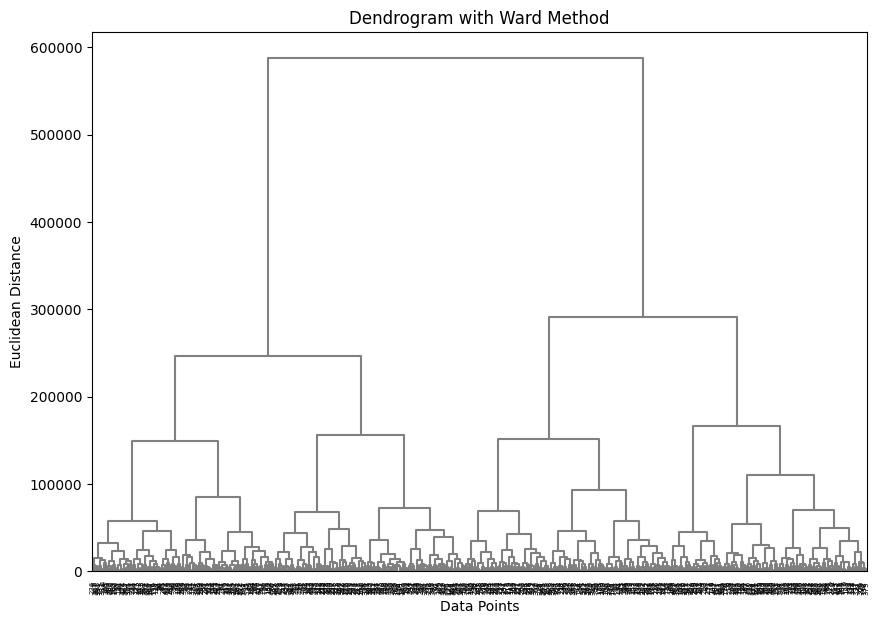

In [31]:
#Unscaled
# Ward Method
linked = linkage(df, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [32]:
# Ward euclidean Scaled
agglo_ward_scaled = AgglomerativeClustering(n_clusters=2, linkage="ward", metric="euclidean")
y_hc_ward_scaled = agglo_ward_scaled.fit_predict(df_scaled)

In [33]:
# Ward euclidean Unscaled
agglo_ward = AgglomerativeClustering(n_clusters=2, linkage="ward", metric="euclidean")
y_hc_ward = agglo_ward.fit_predict(df)

In [34]:
# Evaluation
# Scaled
ss = silhouette_score(df_scaled, y_hc_ward_scaled)
print(ss)

# Unscaled
ss = silhouette_score(df, y_hc_ward)
print(ss)

0.6012726140261916
0.39572706946177905


#MERGE DATA

In [35]:
# Add the cluster labels to the original data
df_scaled['Agglo'] = y_hc_ward_scaled
# Analyze the clusters with the original values
df_scaled.head()

,Income,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Age,Education,Credit_Score,Years_with_Bank,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,0.179150,-0.260713,-1.058293,-1.606308,-0.861669,57,1,503,1,0.975409,1,0.202693,1
1,0.749977,-0.748287,1.619378,0.428724,-1.189034,60,0,779,2,0.945920,2,0.549358,0
2,0.364249,1.619930,0.670893,-0.628469,-0.821645,46,0,519,14,0.272664,3,0.842993,1
3,0.165665,0.993049,1.002068,1.392847,-1.422533,42,0,834,17,0.814385,4,0.119473,0
4,-0.250263,0.331341,-1.547513,1.628264,-0.083694,36,1,410,12,0.346523,4,0.990168,1


In [36]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc_ward_scaled
# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


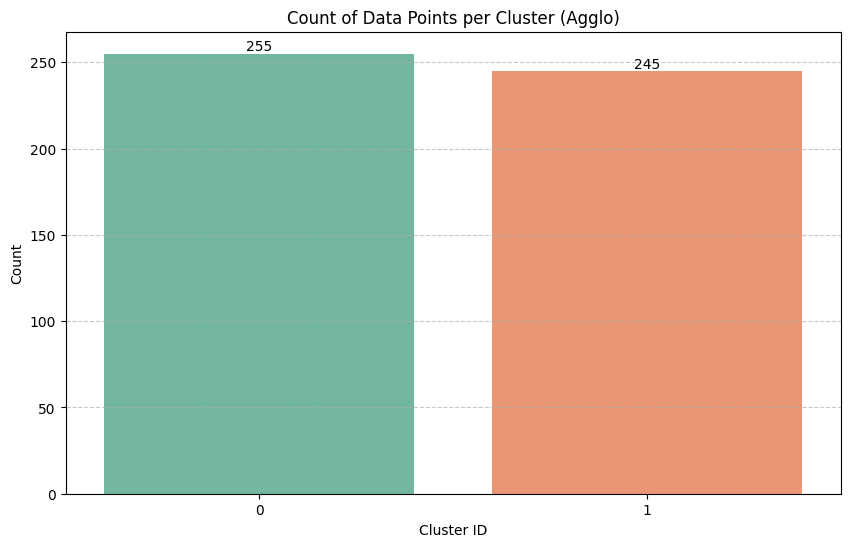

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_scaled['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

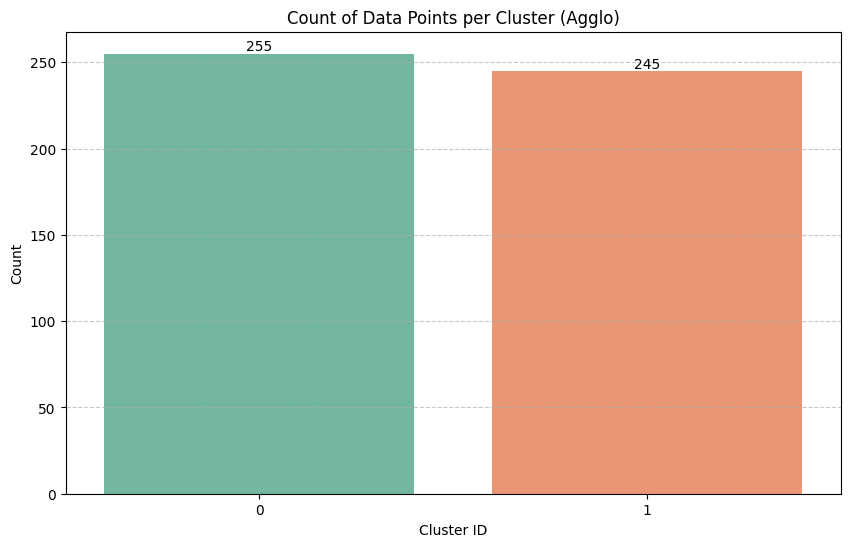

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

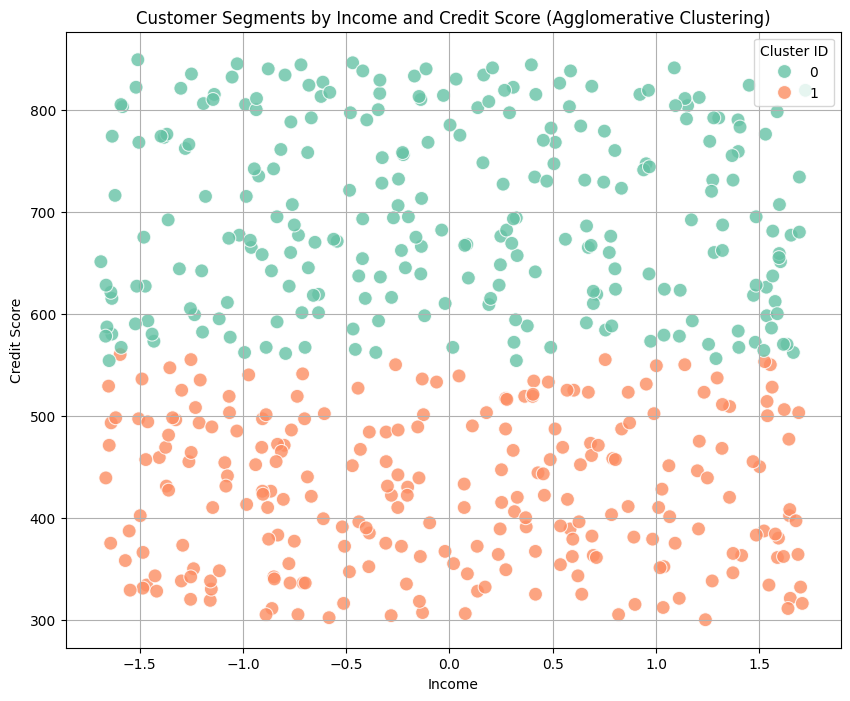

In [42]:
#Scaled
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled, x='Income', y='Credit_Score', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Credit Score (Agglomerative Clustering)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

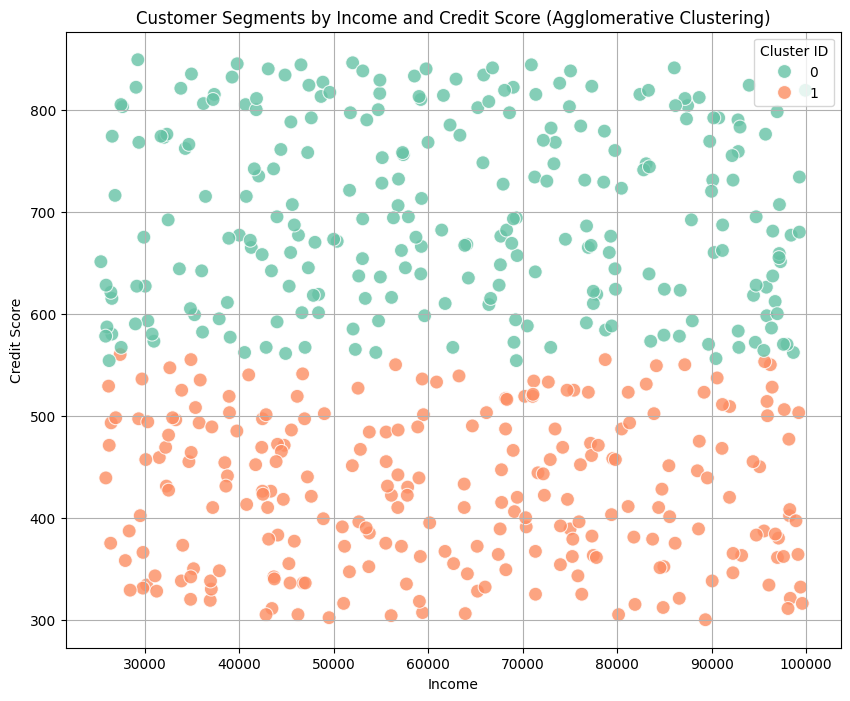

In [43]:
#Unscaled
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income', y='Credit_Score', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Credit Score (Agglomerative Clustering)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [45]:
#scaled
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Age'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_scaled,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_scaled['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [44]:
#unscaled
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Age'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

# Which version (scaled or unscaled) produces clearer cluster separation?

Based on the silhouette scores, the scaled version of the data produces significantly clearer cluster separation.

Scaled Data Silhouette Score: 0.6012726140261916
Unscaled Data Silhouette Score: 0.39572706946177905
A higher silhouette score indicates that data points are well-matched to their own cluster and poorly matched to neighboring clusters, suggesting a good, distinct separation between the clusters. The scaled data achieved a much higher score, implying that the clusters formed are more compact and distinct.

# Why does scaling affect the clustering result?

Scaling affects the clustering results, especially for distance-based algorithms like Agglomerative Clustering.

Equal Feature Contribution: Without scaling, features with larger numerical ranges (e.g., Income which can be in tens of thousands) tend to dominate the distance calculations between data points over features with smaller ranges (e.g., Customer_Satisfaction from 1 to 4 or Education from 0 to 3). This means that the algorithm might prioritize differences in 'Income' even if other features are more important for defining customer segments.

Meaningful Distance Metrics: Scaling, particularly using StandardScaler , transforms all features to have a mean of 0 and a standard deviation of 1. This normalization ensures that each feature contributes equally to the calculation of distances (e.g., Euclidean distance) between data points. When all features are on a comparable scale, the clustering algorithm can identify genuine patterns and groupings based on the combined characteristics of the data, rather than being skewed by the arbitrary units or magnitudes of individual features.



In [48]:
# Scaled
# Group the data by cluster and calculate descriptive statistics for each cluster
cluster_summary = df_scaled.groupby('Agglo').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Age': ['mean', 'std', 'min', 'max'],
    'Education': ['mean', 'count'], # 'mean' for education will show average level
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'std', 'min', 'max', 'count'],
    'Online_Activity': ['mean', 'std', 'min', 'max']
})

# Rename the index for clarity
cluster_summary = cluster_summary.rename_axis('Cluster ID')

# Set display options to show full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the summary
display(cluster_summary)

# Reset display options to default (optional, but good practice)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

Income                                      Age                 \
                mean       std       min       max       mean        std min   
Cluster ID                                                                     
0           0.013447  0.998898 -1.687691  1.723192  39.960784  13.560829  18   
1          -0.013995  1.005039 -1.663611  1.707937  40.061224  12.526379  18   

               Education       Credit_Score                       \
           max      mean count         mean        std  min  max   
Cluster ID                                                         
0           64  1.431373   255   698.909804  89.612484  554  849   
1           64  1.375510   245   425.608163  72.296191  300  560   

           Years_with_Bank                   Transaction_Count            \
                      mean       std min max              mean       std   
Cluster ID                                                                 
0                10.760784  5.210682   1  19          0.024593  0.987183   
1                10.853061  5.098501   1  19         -0.025597  1.016573   

                                 Balance                                \
                 min       max      mean       std       min       max   
Cluster ID                                                               
0          -1.653782  1.759237  0.084573  1.000542 -1.702886  1.683474   
1          -1.653782  1.759237 -0.088025  0.995898 -1.716418  1.679149   

           Loan_Approval_Amount                                \
                           mean       std       min       max   
Cluster ID                                                      
0                     -0.017321  1.032536 -1.706699  1.725528   
1                      0.018028  0.968873 -1.701676  1.704774   

           Credit_Card_Limit                               Purchase_Frequency  \
                        mean       std       min       max               mean   
Cluster ID                                                                      
0                   0.068818  1.005932 -1.723224  1.681174           0.534971   
1                  -0.071626  0.992829 -1.716010  1.656034           0.489628   

                                         Customer_Satisfaction                \
                 std       min       max                  mean       std min   
Cluster ID                                                                     
0           0.276197  0.011290  0.991562              2.521569  1.111202   1   
1           0.288489  0.000813  0.993942              2.608163  1.090916   1   

                     Online_Activity                                
           max count            mean       std       min       max  
Cluster ID                                                          
0            4   255        0.491499  0.298331  0.001432  0.999897  
1            4   245        0.497657  0.290970  0.001320  0.994023

Cluster 0: “Middle-aged, balanced customers with moderate activity and satisfaction.”

Key Characteristics:

Age: Rata-rata 39,96 tahun → pelanggan usia produktif (tidak muda, belum tua).

Income: Sekitar rata-rata (z-score mendekati 0), berarti pendapatan menengah.

Credit Score: Relatif baik (sekitar mean 699/849).

Years with Bank: ±10 tahun → hubungan cukup lama dengan bank.

Transaction Count: sekitar nilai rata-rata → aktivitas transaksi sedang.

Balance dan Credit Card Limit: dalam kisaran normal → keuangan stabil.

Customer Satisfaction: 2,52 → kepuasan menengah, belum optimal.

Online Activity: 0,49 → aktivitas digital sedang, mungkin masih menggunakan layanan offline juga.

Interpretation:
Klaster ini menggambarkan pelanggan stabil dan loyal sedang, dengan perilaku keuangan yang seimbang dan adopsi digital moderat. Mereka bukan pengguna paling aktif, tapi juga bukan yang pasif.

Cluster 1: “Slightly older, low-to-middle income customers with moderate satisfaction.”

Key Characteristics:

Age: 40,06 tahun → sedikit lebih tua dari cluster 0.

Income: Sedikit di bawah rata-rata (z = -0,01) → pendapatan menengah ke bawah.

Credit Score: Lebih rendah (425 dari 560) → risiko kredit lebih tinggi dibanding cluster 0.

Years with Bank: Mirip (~10,8 tahun) → loyalitas sedang.

Transaction Count: hampir sama → aktivitas transaksi normal.

Balance: sedikit negatif secara z-score → saldo cenderung lebih rendah.

Customer Satisfaction: 2,61 → sedikit lebih puas dibanding cluster 0.

Online Activity: 0,49 → sama-sama aktivitas digital moderat.

Interpretation:
Klaster ini merepresentasikan pelanggan sedikit lebih tua dan berpendapatan menengah ke bawah, dengan risiko kredit lebih tinggi tapi kepuasan sedikit lebih baik. Kemungkinan mereka lebih sering menggunakan layanan tradisional dan mencari nilai ekonomis.

3. Managerial Recommendations
For Cluster 0

Profile: Middle-aged, stable income, moderate satisfaction.
Recommendations:

Product Strategy: Tawarkan paket loyalitas atau cashback digital untuk mendorong penggunaan aplikasi mobile banking.

Marketing: Gunakan pendekatan omni-channel (online + offline) karena mereka cukup aktif di keduanya.

Retention: Fokus pada peningkatan kepuasan digital experience, misalnya fitur transaksi cepat dan layanan pelanggan online yang responsif.

For Cluster 1

Profile: Older, lower income, moderate satisfaction, lower credit score.
Recommendations:

Product Strategy: Berikan produk kredit ringan atau tabungan berhadiah untuk meningkatkan engagement tanpa membebani finansial mereka.

Marketing: Gunakan kampanye edukasi keuangan dan pendekatan personal (misalnya konsultasi di cabang).

Retention: Perkuat kepercayaan dan kemudahan layanan agar mereka tetap setia meskipun kondisi finansial lebih terbatas.

In [47]:
# Unscaled
# Group the data by cluster and calculate descriptive statistics for each cluster
cluster_summary = df.groupby('Agglo').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Age': ['mean', 'std', 'min', 'max'],
    'Education': ['mean', 'count'], # 'mean' for education will show average level
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'std', 'min', 'max', 'count'],
    'Online_Activity': ['mean', 'std', 'min', 'max']
})

# Rename the index for clarity
cluster_summary = cluster_summary.rename_axis('Cluster ID')

# Set display options to show full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the summary
display(cluster_summary)

# Reset display options to default (optional, but good practice)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

Income                                                Age  \
                    mean           std          min          max       mean   
Cluster ID                                                                    
0           62538.764289  21835.753607  25352.16071  99913.52549  39.960784   
1           61938.884332  21969.994429  25878.55631  99580.05922  40.061224   

                              Education       Credit_Score                  \
                  std min max      mean count         mean        std  min   
Cluster ID                                                                   
0           13.560829  18  64  1.431373   255   698.909804  89.612484  554   
1           12.526379  18  64  1.375510   245   425.608163  72.296191  300   

                Years_with_Bank                   Transaction_Count  \
            max            mean       std min max              mean   
Cluster ID                                                            
0           849       10.760784  5.210682   1  19         49.192157   
1           560       10.853061  5.098501   1  19         47.751020   

                                   Balance                          \
                  std min max         mean          std        min   
Cluster ID                                                           
0           28.345561   1  99  5310.074157  2925.072328  84.461392   
1           29.189447   1  99  4805.484430  2911.493576  44.900440   

                        Loan_Approval_Amount                             \
                    max                 mean           std          min   
Cluster ID                                                                
0           9984.440444         25148.824111  14706.230218  1087.318821   
1           9971.796087         25652.281836  13799.483555  1158.851122   

                        Credit_Card_Limit                            \
                    max              mean          std          min   
Cluster ID                                                            
0           49971.89523      10993.057486  5599.694877  1017.345471   
1           49676.31273      10211.251295  5526.758083  1057.503456   

                        Purchase_Frequency                                \
                    max               mean       std       min       max   
Cluster ID                                                                 
0           19968.52056           0.534971  0.276197  0.011290  0.991562   
1           19828.57514           0.489628  0.288489  0.000813  0.993942   

           Customer_Satisfaction                         Online_Activity  \
                            mean       std min max count            mean   
Cluster ID                                                                 
0                       2.521569  1.111202   1   4   255        0.491499   
1                       2.608163  1.090916   1   4   245        0.497657   

                                          
                 std       min       max  
Cluster ID                                
0           0.298331  0.001432  0.999897  
1           0.290970  0.001320  0.994023

Cluster Analysis and Interpretation
Cluster 0 – “Mid-age, financially stable customers with good credit and moderate satisfaction.”

Key Characteristics:

Income: 62,538 → pendapatan menengah ke atas.

Age: 39,9 tahun → usia produktif, cenderung mid-age.

Education: 1,43 → bisa diasumsikan pendidikan menengah (mungkin sarjana awal atau diploma).

Credit Score: 698/849 → kredit sangat baik, pelanggan berisiko rendah.

Years with Bank: 10,76 tahun → loyalitas tinggi, sudah lama menjadi nasabah.

Transaction Count: 49 transaksi → cukup aktif.

Balance: 5.310 → saldo sedang-tinggi.

Loan Approval Amount: 25.148 → kemampuan kredit bagus.

Credit Card Limit: 10.993 → limit besar, sesuai dengan profil berpendapatan baik.

Purchase Frequency: 0.53 → aktivitas belanja moderat.

Customer Satisfaction: 2.52 (dari 4) → kepuasan menengah, belum sepenuhnya puas.

Online Activity: 0.49 → aktivitas digital moderat, belum sepenuhnya digital-savvy.

Interpretation:
Klaster ini mewakili pelanggan stabil secara finansial, berpenghasilan menengah ke atas, dan memiliki riwayat kredit baik. Mereka sudah lama menjadi nasabah, cukup aktif bertransaksi, namun belum sepenuhnya puas — mungkin karena ekspektasi tinggi terhadap layanan.

Cluster 1 – “Slightly older, lower-credit customers with modest satisfaction.”

Key Characteristics:

Income: 61,938 → sedikit lebih rendah dari Cluster 0.

Age: 40 tahun → mirip usia produktif, sedikit lebih tua.

Education: 1.38 → tingkat pendidikan sedikit lebih rendah.

Credit Score: 425/560 → lebih rendah, menunjukkan risiko kredit lebih tinggi.

Years with Bank: 10,85 tahun → hubungan cukup lama dengan bank.

Transaction Count: 47,75 → sedikit kurang aktif dibanding cluster 0.

Balance: 4.805 → saldo lebih kecil.

Loan Approval Amount: 25.652 → mirip cluster 0, masih punya akses kredit moderat.

Credit Card Limit: 10.211 → lebih kecil, sejalan dengan credit score-nya.

Purchase Frequency: 0.49 → aktivitas belanja hampir sama.

Customer Satisfaction: 2.61 → sedikit lebih tinggi, tapi masih menengah.

Online Activity: 0.49 → aktivitas digital sama-sama moderat.

Interpretation:
Klaster ini menggambarkan pelanggan dengan pendapatan menengah, skor kredit lebih rendah, dan aktivitas finansial lebih terbatas. Mereka sedikit lebih puas, tapi kemungkinan lebih konservatif atau berhati-hati secara finansial.

💼 3. Managerial Recommendations
Cluster 0 – Financially Stable, Loyal Mid-age Segment

Profile: Pendapatan menengah ke atas, kredit bagus, loyal tapi kepuasan belum maksimal.
Recommendations:

Product: Tawarkan produk investasi, tabungan premium, atau kartu kredit reward untuk meningkatkan value dan loyalitas.

Marketing: Fokus pada digital convenience dan personalized offer (misalnya cashback, bonus poin).

Retention: Perkuat customer experience digital seperti aplikasi mobile dengan fitur analisis keuangan pribadi.

Cluster 1 – Conservative, Moderate-income Customers

Profile: Pendapatan menengah, risiko kredit lebih tinggi, kepuasan cukup baik.
Recommendations:

Product: Buat program edukasi finansial atau kredit mikro dengan bunga rendah untuk membantu mereka meningkatkan kepercayaan dan skor kredit.

Marketing: Gunakan pendekatan personal dan edukatif, misalnya promosi berbasis kebutuhan rumah tangga.

Retention: Beri insentif loyalitas (misalnya bonus saldo atau cashback kecil) untuk menjaga hubungan jangka panjang.